In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [3]:
os.chdir("D:/Flipkart-data-collection")

In [4]:
data = pd.read_csv('Flipkart Mobile Data Cleaned and Preprocessed.csv',index_col=0)

In [5]:
data.head()

,Mobile Brand,Mobile Color,Mobile_Display(in cm),Mobile_Display(in inch),RAM,Storage,Expandable Memory,Battery,Battery_Types,Front_Camera,Camera_Types,Rating,Price
0,realme C11,Rich Grey,2,2,0,0,0,1,0,0,2,4.4,6999
1,realme C11,Rich Green,2,2,0,0,0,1,0,0,2,4.4,6999
2,POCO C3,Arctic Blue,5,5,2,1,0,1,1,0,3,4.3,7999
3,Redmi 9 Prime,Space Blue,5,5,2,1,0,2,0,1,8,4.4,9499
4,realme 8 Pro,Infinite Blue,1,1,3,2,0,0,0,2,0,4.5,17999


In [6]:
# our independent variables are ram, storage and front_camera and dependent variable is price
x = data[['RAM','Storage','Front_Camera']]
y = data['Price']

In [7]:
# separating data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [8]:
# train data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
coeff_df = pd.DataFrame(regressor.coef_,x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
RAM,980.530892
Storage,1560.013499
Front_Camera,2171.768785


In [10]:
y_pred = regressor.predict(x_test) # making prediction

In [11]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
574,10499,10709.278389
661,11999,13249.822780
458,7999,8537.509604
1023,15999,16402.122456
958,4999,5016.434323
...,...,...
1111,12999,13861.578066
1074,7199,7188.203108
744,4999,5016.434323
731,14999,14441.060673


In [12]:
df.head(10)

,Actual,Predicted
574,10499,10709.278389
661,11999,13249.822780
458,7999,8537.509604
1023,15999,16402.122456
958,4999,5016.434323
233,7999,8537.509604
1323,9499,10709.278389
364,17999,15421.591565
760,7199,7188.203108
465,15499,17593.360350


In [13]:
from sklearn import metrics

In [14]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1049.1166397615088
Mean Squared Error: 1951454.2268096893
Root Mean Squared Error: 1396.9446040590476


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8787222114454918

In [16]:
print(regressor.intercept_)

5016.434322509513


In [26]:
score = regressor.score(x_test, y_test) * 100 # checking accuracy of the model
print(score)

87.87222114454917


In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(1072, 3)
(268, 3)
(1072,)
(268,)
(268,)


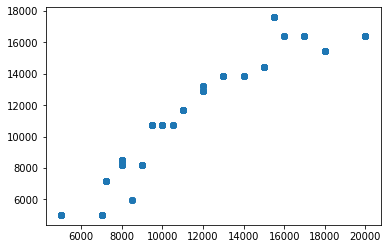

In [19]:
plt.scatter(y_test,y_pred)

In [20]:
"""import pickle
pickle_out = open("prediction.pkl", mode = "wb")
pickle.dump(regressor,pickle_out)
pickle_out.close()
"""

'import pickle\npickle_out = open("prediction.pkl", mode = "wb")\npickle.dump(regressor,pickle_out)\npickle_out.close()\n'

# Conclusion

we have successfuly create model with accuracy 87.87%
The prediction equation become,

# Price = 980.53 * RAM + 1560.01 * Storage + 2171.76 * Front_Camera + 5016.43


In [21]:
# create function to check working of model
def mobile_price_prediction(ram,storage,front_camera):
    ram_coef = 980.530892
    storage_coef = 1560.013499
    front_camera_coef = 2171.768785
    
    if ram == '2 GB':
        ram = 0
    elif ram == '3 GB':
        ram = 1
    elif ram == '4 GB':
        ram = 2
    elif ram == '6 GB':
        ram = 3
    elif ram == '8 GB':
        ram = 4
    
    if storage == '32 GB':
        storage = 0
    elif storage == '64 GB':
        storage = 1
    elif storage == '128 GB':    
        storage = 2
        
    if front_camera == '5 MP':
        front_camera = 0
    elif front_camera == '8 MP':
        front_camera = 1
    elif front_camera == '16 MP':
        front_camera = 2
    elif front_camera == '20 MP':
        front_camera = 3
        
    price = ram_coef * ram + storage_coef * storage + front_camera_coef * front_camera + regressor.intercept_
    
    return round(price,2)

In [22]:
mobile_price_prediction('4 GB','64 GB', '20 MP')

15052.82

In [23]:
mobile_price_prediction('8 GB','128 GB','8 MP')

14230.35

In [24]:
mobile_price_prediction('4 GB','64 GB','5 MP')

8537.51

In [25]:
mobile_price_prediction('6 GB','64 GB','16 MP')

13861.58